In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
from numpy import loadtxt

Populating the interactive namespace from numpy and matplotlib


In [19]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/ElNino_SLA.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

en_sla_x=lines[:,0]
en_sla_y=lines[:,1]
en_sla=lines[:,2]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03   3.24563599e+00]
 ..., 
 [  5.62500000e+03  -4.97500000e+03              nan]
 [  5.67500000e+03  -4.97500000e+03              nan]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)


In [22]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/ElNino_SLP.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

en_slp_x=lines[:,0]
en_slp_y=lines[:,1]
en_slap=lines[:,2]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03   9.00472924e-02]
 ..., 
 [  5.62500000e+03  -4.97500000e+03   1.23834932e+00]
 [  5.67500000e+03  -4.97500000e+03   1.23524916e+00]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)


In [20]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/SAM_SLA_pos.xyz", comments="#", delimiter=" ", unpack=False)
print lines
print lines.shape

sam_sla_x=lines[:,0]
sam_sla_y=lines[:,1]
sam_sla=lines[:,2]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03   1.56800000e+00]
 [ -4.37500000e+03   5.72500000e+03   7.43000000e-01]
 ..., 
 [  5.62500000e+03  -4.97500000e+03              nan]
 [  5.67500000e+03  -4.97500000e+03              nan]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)


In [23]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/SAM_SLP_pos.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

sam_slp_x=lines[:,0]
sam_slp_y=lines[:,1]
sam_slp=lines[:,2]


[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03  -3.28661278e-02]
 ..., 
 [  5.62500000e+03  -4.97500000e+03   5.43155134e-01]
 [  5.67500000e+03  -4.97500000e+03   5.33551574e-01]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)


In [52]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/XY_lonlat.xy", comments="#", delimiter=" ", unpack=False)
print lines
print lines.shape

x=lines[:,0]
y=lines[:,1]
lon=lines[:,2]
lat=lines[:,3]


[[-4475.      5725.       -38.0133   -29.1417]
 [-4425.      5725.       -37.7014   -29.3543]
 [-4375.      5725.       -37.3868   -29.5659]
 ..., 
 [ 5625.     -4975.       131.491    -27.4741]
 [ 5675.     -4975.       131.239    -27.219 ]
 [ 5725.     -4975.       130.99     -26.9637]]
(44075, 4)


In [77]:
print np.nanmax(sam_sla)
print np.nanmin(sam_sla)

print lon.size
print lat.size
print sam_sla.size

print np.max(lat)
print np.max(lon)



8.465
-10.779
44075
44075
44075
-23.5624
179.712


In [76]:
print lat[0:10], lon[0:10], sam_sla[0:10]

[-29.1417 -29.3543 -29.5659 -29.7764 -29.9858 -30.1941 -30.4012 -30.6071
 -30.8118 -31.0152] [-38.0133 -37.7014 -37.3868 -37.0695 -36.7496 -36.427  -36.1017 -35.7737
 -35.4429 -35.1094] [   nan  1.568  0.743  0.78   0.387  0.546  0.644  0.712  0.78   0.831]


In [64]:
X, Y = map(lon,lat) 
data = map(sam_sla,sam_sla) 
lon

array([ -38.0133,  -37.7014,  -37.3868, ...,  131.491 ,  131.239 ,  130.99  ])

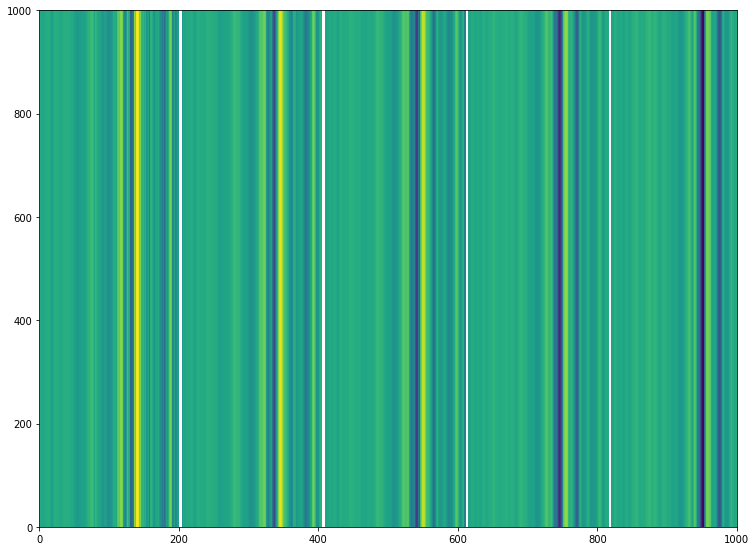

In [75]:
data = np.meshgrid(sam_sla[:1000],sam_sla[:1000]) 
data=np.asarray(data)
data.shape
plt.pcolor(data[0,:])


IndexError: too many indices for array

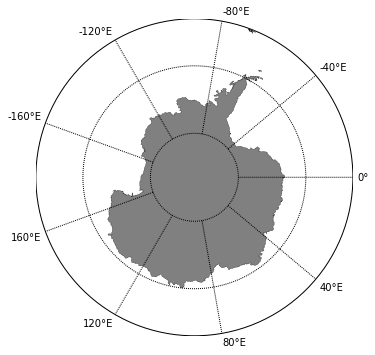

In [74]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-10,10,.1)

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon[:1000],lat[:1000])
X.shape
p1=map.contourf(X,Y,data[0,:])#, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')
